In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

print(np.max(train_images))
print(np.max(test_images))

255
255


In [4]:

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded, and scales them to values between 0 and 1.
    """
    
    scaled_train_images = train_images/np.max(train_images)
    scaled_test_images = test_images/np.max(test_images)
    
    return (scaled_train_images, scaled_test_images)



scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [5]:

def get_model(input_shape):
    """
    This function builds a Sequential model--convolutional neural network with 6 layers.
    """
    model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding = 'same', input_shape=input_shape, activation='relu'),
    MaxPooling2D((2,2), strides =(1,1)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])
              
    return model

#get the model

model = get_model(scaled_train_images[0].shape)

model.summary()

print(scaled_train_images[0].shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5832)              0         
                                                                 
 dense (Dense)               (None, 64)                373312    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [6]:

def compile_model(model):
    """
    This function takes in the model returned from the previous get_model function, and compiles it with an optimiser,
    loss function and metric. Here, we have used the Adam optimiser, the cross-entropy loss function and accuracy as the only metric. 
    """
    opt = tf.keras.optimizers.Adam()

    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics = ['accuracy'])
    
# compile the model

compile_model(model)

In [7]:

def train_model(model, scaled_train_images, train_labels):
    """
    This function trains the model and returns the training history.
    """
    history = model.fit(train_images, train_labels, epochs = 5, verbose = 2)
    
    return history

# train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 - 13s - loss: 0.6745 - accuracy: 0.9206 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 13s - loss: 0.1148 - accuracy: 0.9663 - 13s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 13s - loss: 0.0860 - accuracy: 0.9744 - 13s/epoch - 7ms/step
Epoch 4/5
1875/1875 - 13s - loss: 0.0748 - accuracy: 0.9771 - 13s/epoch - 7ms/step
Epoch 5/5
1875/1875 - 13s - loss: 0.0619 - accuracy: 0.9814 - 13s/epoch - 7ms/step


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

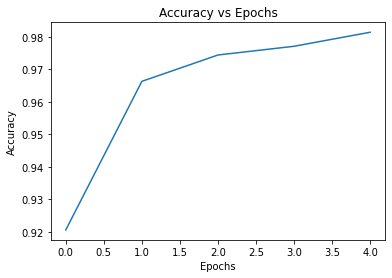

In [8]:
# the Accuracy vs Epochs plot
frame = pd.DataFrame(history.history)

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

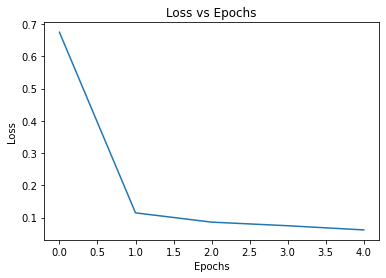

In [9]:
# the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [10]:

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function evaluates the model on the scaled_test_images and test_labels.
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)

    return (test_loss, test_accuracy)

# evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 2.2989 - accuracy: 0.1135
Test loss: 2.298938512802124
Test accuracy: 0.11349999904632568


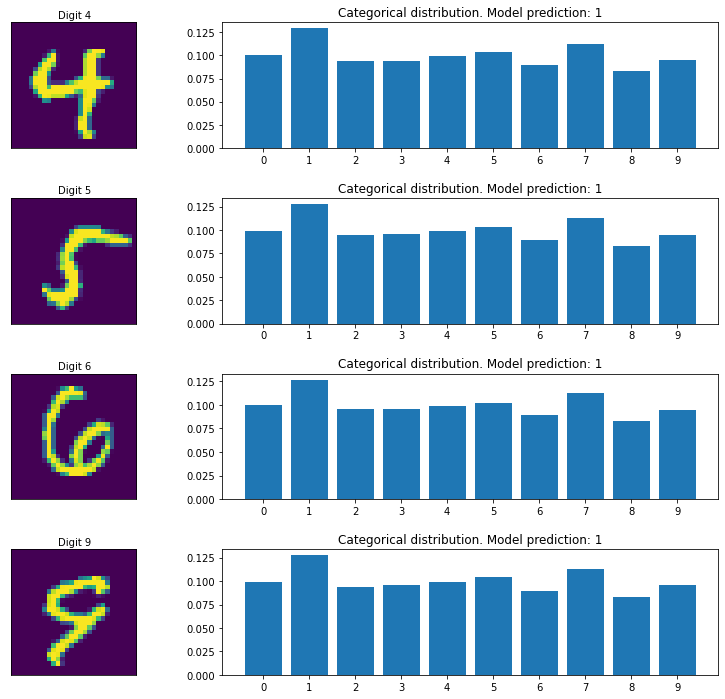

In [11]:
# getting model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()